In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PolynomialFeatures
import datetime 
import pytz
from pytz import timezone
import tarfile
from numpy import load
import os
from sklearn.manifold import TSNE
import h5py
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
import scipy as sp
from scipy import spatial

In [75]:
h5 = h5py.File('sound_data_improved.hdf5', 'r')

In [76]:
d = h5['sound_data']

In [77]:
sample_nums = np.random.choice(range(3388858), 10000, replace = False)

In [78]:
index = np.zeros(d.shape[0]).astype('bool')
index[sample_nums] = True

In [79]:
pca_106 = sklearnPCA(106)  
projected = pca_106.fit_transform(d['feature_vector'])

In [80]:
projected_tsne = TSNE(n_components=2).fit_transform(projected[index])

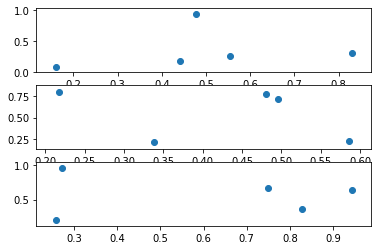

In [81]:
plt.figure()
plt.subplot(311)
plt.scatter(np.random.random(5), np.random.random(5))
plt.subplot(312)
plt.scatter(np.random.random(5), np.random.random(5))
plt.subplot(313)
plt.scatter(np.random.random(5), np.random.random(5))
plt.show()

In [82]:
#it seems DBSCAN is thinking there's only one cluster, which means there's only one label, which is causing the error.
# plt.figure(figsize=(5,45))
# for idx,eps_var in enumerate(range(35, 45)):
#     eps_x = eps_var/10.0
#     dbscan = DBSCAN(eps=eps_x)
#     dbscan_clusters = dbscan.fit_predict(projected)
# #     plt.subplot(16,1,idx+1)
#     plt.scatter(projected_tsne[:, 0], projected_tsne[:, 1], c=dbscan_clusters, s = 1)
#     silhouette_score = metrics.silhouette_score(projected, dbscan.labels_)
#     c_h_score = metrics.calinski_harabasz_score(projected, dbscan.labels_)
#     d_b_score = davies_bouldin_score(projected_tsne, dbscan.labels_) 
#     plt.title('eps = ' + str(eps_var/10.0) + ', silhouette score = ' + str(silhouette_score) \
#              + ', calinski harabasz score = ' + str(c_h_score) \
#              + ', davies bouldin score = ' + str(d_b_score))
#     plt.tight_layout()
#     plt.show()

Plot 1: eps = 5.0, silhouette score = -0.10380445, calinski harabasz score = 520.5388018160942, davies bouldin score = 1.9102716741428796
Plot 2: eps = 5.1, silhouette score = -0.09895782, calinski harabasz score = 446.2835719400623, davies bouldin score = 1.908180042358751
Plot 3: eps = 5.2, silhouette score = -0.05144452, calinski harabasz score = 698.2371433320282, davies bouldin score = 1.9196495312170847
Plot 4: eps = 5.3, silhouette score = -0.011652306, calinski harabasz score = 911.3598419385733, davies bouldin score = 1.9629722853601885
Plot 5: eps = 5.4, silhouette score = 0.028505793, calinski harabasz score = 847.8445950622922, davies bouldin score = 1.8299973247725387
Plot 6: eps = 5.5, silhouette score = 0.10994415, calinski harabasz score = 885.4457408658233, davies bouldin score = 1.9081080957251555
Plot 7: eps = 5.6, silhouette score = 0.04064356, calinski harabasz score = 822.8491279757251, davies bouldin score = 1.9018666107716222
Plot 8: eps = 5.7, silhouette score 

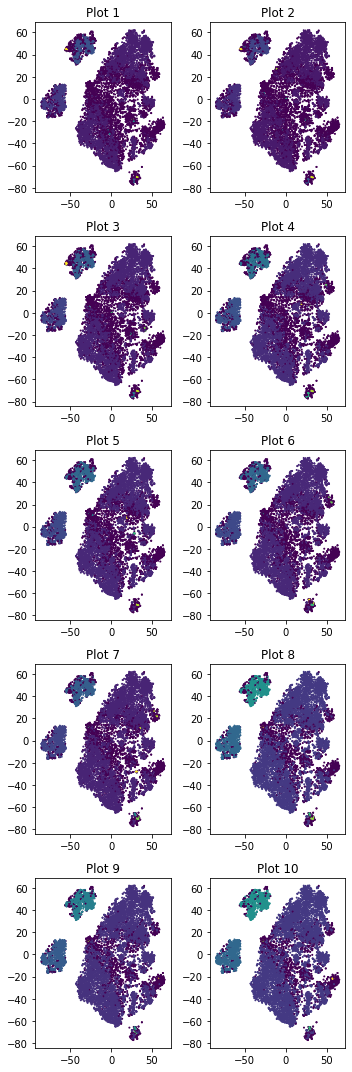

In [83]:
plt.figure(figsize=(5, 15))
idx = 1
for eps_var in range(50, 60):
    eps_x = eps_var/10.0
    dbscan = DBSCAN(eps=eps_x)
    dbscan_clusters = dbscan.fit_predict(projected[index])
    plt.subplot(5, 2, idx)
    plt.scatter(projected_tsne[:, 0], projected_tsne[:, 1], c=dbscan_clusters, s = 1)
    plt.title('Plot ' + str(idx))
    silhouette_score = metrics.silhouette_score(projected[index], dbscan.labels_, metric='euclidean')
    c_h_score = metrics.calinski_harabasz_score(projected[index], dbscan.labels_)
    d_b_score = davies_bouldin_score(projected[index], dbscan.labels_) 
    print('Plot ' + str(idx) + ': eps = ' + str(eps_var/10.0) + ', silhouette score = ' + str(silhouette_score) \
             + ', calinski harabasz score = ' + str(c_h_score) \
             + ', davies bouldin score = ' + str(d_b_score))
    idx += 1
plt.tight_layout()
plt.show()

In [84]:
#eps 5.7 seems to be good
dbscan = DBSCAN(eps=5.7)
dbscan_clusters = dbscan.fit_predict(projected[index])
dbscan.components_

array([[-3.3339434e+00, -2.5864601e+00,  2.0445765e-03, ...,
        -6.2287025e-02,  4.4186330e-01,  1.1109738e-01],
       [-3.4061666e+00, -1.3258184e+00, -2.6849678e+00, ...,
        -2.1651796e-01, -8.6538740e-02,  2.6487488e-01],
       [ 1.8157475e+01, -2.4139411e+00,  5.5110425e-01, ...,
         2.4461539e-01, -1.4013430e-01, -1.7481232e-01],
       ...,
       [-3.8098345e+00, -9.3233120e-01,  1.4648025e+00, ...,
         2.2708486e-01,  2.3889481e-01, -2.4181945e-02],
       [-2.3659399e+00,  2.1271672e+00, -1.8350515e+00, ...,
        -6.1661497e-02, -1.9578002e-01, -8.6349368e-02],
       [ 1.7779284e+01,  1.9908479e+00, -8.0479962e-01, ...,
        -5.1646048e-01, -9.6915834e-02, -3.8008258e-01]], dtype=float32)

# Nearest Neighbors and Corresponding Audio Files

In [86]:
tree = spatial.KDTree(projected[index])

In [87]:
dbscan.components_.shape

(7220, 106)